# Mercedes F1 Infringement Documents Count by Year

Simple analysis showing the number of Mercedes infringement TXT files per year.


In [15]:
# Import required libraries
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [16]:
# Define paths and count TXT files
base_path = Path("Documents")
years = ["2020_inf_profile", "2021_inf_profile", 
         "2022_inf_profile", "2023_inf_profile", "2024_inf_profile"]

# Count TXT files in each year
txt_counts = {}
for year_folder in years:
    year_path = base_path / year_folder
    if year_path.exists():
        txt_count = len(list(year_path.glob("*.txt")))
        txt_counts[year_folder] = txt_count
        year_display = year_folder.replace('_inf_profile', '')
        print(f"{year_display}: {txt_count} TXT files")
    else:
        txt_counts[year_folder] = 0
        print(f"{year_folder}: Folder not found")

# Create DataFrame
df = pd.DataFrame([
    {'Year': year.replace('_inf_profile', ''), 'Violations': txt_counts[year]}
    for year in years
])

print(f"\nTotal TXT files: {sum(txt_counts.values())}")


2020: 11 TXT files
2021: 16 TXT files
2022: 15 TXT files
2023: 23 TXT files
2024: 17 TXT files

Total TXT files: 82


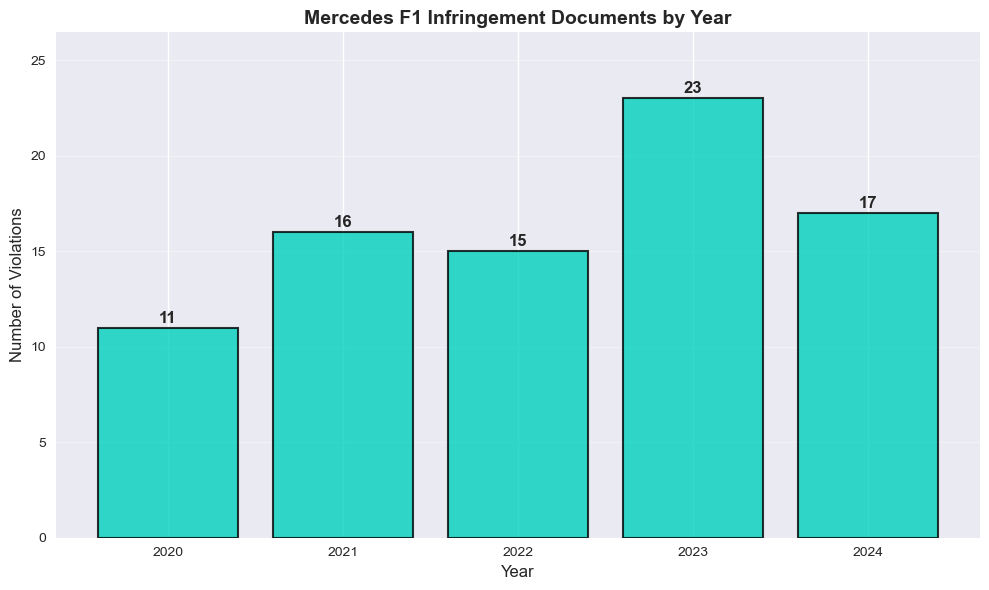

Total violations: 82
Average per year: 16.4


In [17]:
# Create bar chart
plt.figure(figsize=(10, 6))

# Create the bar chart
bars = plt.bar(df['Year'], df['Violations'], 
               color='#00D2BE', edgecolor='black', linewidth=1.5, alpha=0.8)

# Add count labels on top of each bar
for bar, count in zip(bars, df['Violations']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', va='bottom', fontsize=12, fontweight='bold')

# Customize the chart
plt.title('Mercedes F1 Infringement Documents by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Violations', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(df['Violations']) * 1.15)

plt.tight_layout()
plt.show()

print(f"Total violations: {df['Violations'].sum()}")
print(f"Average per year: {df['Violations'].mean():.1f}")


In [18]:
# Document Length Analysis
print("\n" + "="*60)
print("DOCUMENT LENGTH ANALYSIS")
print("="*60)

# Calculate average document length for each year
avg_lengths = {}
total_chars = {}
doc_counts = {}

for year_folder in years:
    year_path = base_path / year_folder
    year_display = year_folder.replace('_inf_profile', '')
    
    if not year_path.exists():
        avg_lengths[year_display] = 0
        total_chars[year_display] = 0
        doc_counts[year_display] = 0
        continue
    
    # Get all TXT files
    txt_files = list(year_path.glob("*.txt"))
    
    if not txt_files:
        avg_lengths[year_display] = 0
        total_chars[year_display] = 0
        doc_counts[year_display] = 0
        continue
    
    # Calculate lengths
    lengths = []
    year_total_chars = 0
    
    for txt_file in txt_files:
        try:
            with open(txt_file, 'r', encoding='utf-8') as f:
                content = f.read()
                length = len(content)
                lengths.append(length)
                year_total_chars += length
        except Exception as e:
            continue
    
    if lengths:
        avg_length = np.mean(lengths)
        avg_lengths[year_display] = avg_length
        total_chars[year_display] = year_total_chars
        doc_counts[year_display] = len(lengths)
        
        print(f"{year_display}: {len(lengths)} docs, avg length: {avg_length:.0f} chars")
    else:
        avg_lengths[year_display] = 0
        total_chars[year_display] = 0
        doc_counts[year_display] = 0

print(f"\nTotal documents analyzed: {sum(doc_counts.values())}")
print(f"Total characters: {sum(total_chars.values()):,}")



DOCUMENT LENGTH ANALYSIS
2020: 11 docs, avg length: 1621 chars
2021: 16 docs, avg length: 1767 chars
2022: 15 docs, avg length: 1498 chars
2023: 23 docs, avg length: 1618 chars
2024: 17 docs, avg length: 1862 chars

Total documents analyzed: 82
Total characters: 137,437


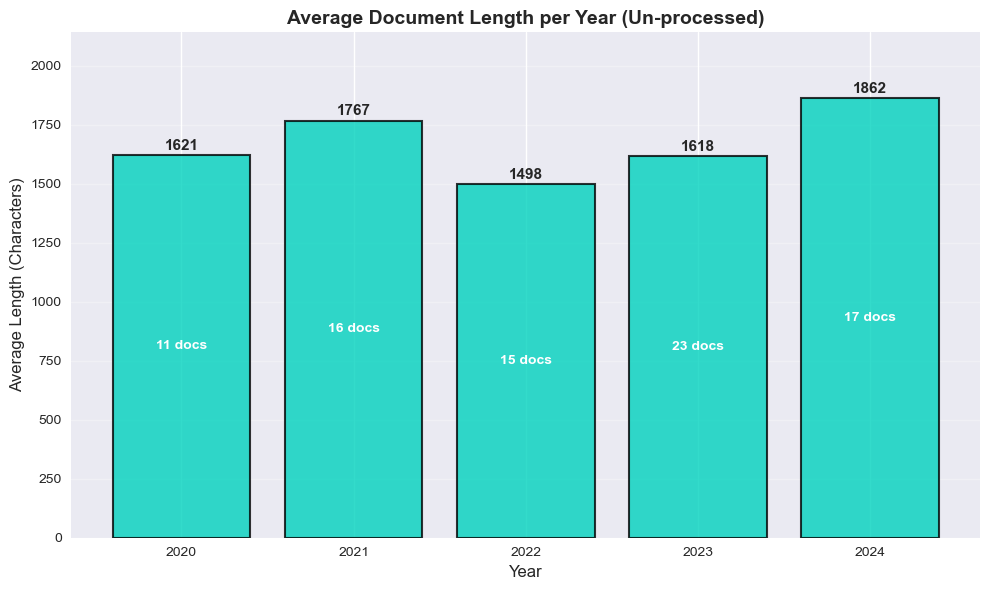


Document Length Summary:
Overall average length: 1673 characters
Year with longest docs: 2024 (1862 chars)
Year with shortest docs: 2022 (1498 chars)
Standard deviation: 142 characters


In [19]:
# Create DataFrame and bar chart for document lengths
df_lengths = pd.DataFrame([
    {'Year': year, 'Avg_Length': avg_lengths[year], 'Doc_Count': doc_counts[year]}
    for year in avg_lengths.keys()
])

# Create bar chart for average document length
plt.figure(figsize=(10, 6))

# Create the bar chart
bars = plt.bar(df_lengths['Year'], df_lengths['Avg_Length'], 
               color='#00D2BE', edgecolor='black', linewidth=1.5, alpha=0.8)

# Add average length labels on top of each bar
for bar, avg_len in zip(bars, df_lengths['Avg_Length']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{avg_len:.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize the chart
plt.title('Average Document Length per Year (Un-processed)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Length (Characters)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(df_lengths['Avg_Length']) * 1.15)

# Add document count annotations
for i, (year, avg_len, count) in enumerate(zip(df_lengths['Year'], df_lengths['Avg_Length'], df_lengths['Doc_Count'])):
    plt.text(i, avg_len/2, f'{count} docs', ha='center', va='center', 
             fontsize=10, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nDocument Length Summary:")
print(f"Overall average length: {df_lengths['Avg_Length'].mean():.0f} characters")
print(f"Year with longest docs: {df_lengths.loc[df_lengths['Avg_Length'].idxmax(), 'Year']} ({df_lengths['Avg_Length'].max():.0f} chars)")
print(f"Year with shortest docs: {df_lengths.loc[df_lengths['Avg_Length'].idxmin(), 'Year']} ({df_lengths['Avg_Length'].min():.0f} chars)")
print(f"Standard deviation: {df_lengths['Avg_Length'].std():.0f} characters")


In [23]:
# UPDATED: Car-wise infringement analysis - CONTENT-BASED
print("\n" + "="*60)
print("CAR-WISE INFRINGEMENT ANALYSIS (CONTENT-BASED)")
print("="*60)

# Define Mercedes car numbers
mercedes_cars = {
    'Car 44': 'Lewis Hamilton',
    'Car 77': 'Valtteri Bottas', 
    'Car 63': 'George Russell'
}

# Initialize car counts by year
car_counts_content = {}
for year_folder in years:
    year_display = year_folder.replace('_inf_profile', '')
    car_counts_content[year_display] = {}
    for car in mercedes_cars.keys():
        car_counts_content[year_display][car] = 0
    car_counts_content[year_display]['Team'] = 0  # For documents not specific to any car

# Count car-specific infringements by reading file content
for year_folder in years:
    year_path = base_path / year_folder
    year_display = year_folder.replace('_inf_profile', '')
    
    if not year_path.exists():
        continue
    
    # Get all TXT files
    txt_files = list(year_path.glob("*.txt"))
    print(f"\nProcessing {len(txt_files)} files in {year_display}...")
    
    for txt_file in txt_files:
        try:
            # Read the content of the TXT file
            with open(txt_file, 'r', encoding='utf-8') as f:
                content = f.read().lower()
            
            # Check for each car number in the content
            car_found = False
            for car_num in mercedes_cars.keys():
                # Look for patterns like "car 44", "car 77", "car 63"
                car_pattern = car_num.lower()
                if car_pattern in content:
                    car_counts_content[year_display][car_num] += 1
                    car_found = True
                    print(f"  ✓ {txt_file.name} -> {car_num}")
                    break
            
            # If no specific car found, assign to "Team"
            if not car_found:
                car_counts_content[year_display]['Team'] += 1
                print(f"  • {txt_file.name} -> Team document")
                
        except Exception as e:
            print(f"  ✗ Error reading {txt_file.name}: {e}")

# Display results
print("\nCar-wise infringement counts by year (CONTENT-BASED):")
print("-" * 60)
for year in car_counts_content.keys():
    print(f"\n{year}:")
    for car, count in car_counts_content[year].items():
        if count > 0:
            if car == 'Team':
                print(f"  Team documents: {count} infringements")
            else:
                driver = mercedes_cars[car]
                print(f"  {car} ({driver}): {count} infringements")

# Calculate totals
print(f"\nTotal infringements by car (CONTENT-BASED):")
print("-" * 50)
car_totals_content = {}
for car in mercedes_cars.keys():
    total = sum(car_counts_content[year][car] for year in car_counts_content.keys())
    car_totals_content[car] = total
    driver = mercedes_cars[car]
    print(f"{car} ({driver}): {total} total infringements")

team_total_content = sum(car_counts_content[year]['Team'] for year in car_counts_content.keys())
print(f"Team documents: {team_total_content} total infringements")

# Find most problematic year for each driver
print(f"\nMost problematic year for each driver (CONTENT-BASED):")
print("-" * 60)
for car in mercedes_cars.keys():
    driver = mercedes_cars[car]
    max_count = 0
    max_year = ""
    for year in car_counts_content.keys():
        if car_counts_content[year][car] > max_count:
            max_count = car_counts_content[year][car]
            max_year = year
    if max_count > 0:
        print(f"  {driver}: {max_year} ({max_count} infringements)")

print(f"\nTotal infringements by year (CONTENT-BASED):")
print("-" * 50)
for year in car_counts_content.keys():
    total = sum(car_counts_content[year].values())
    print(f"  {year}: {total} infringements")



CAR-WISE INFRINGEMENT ANALYSIS (CONTENT-BASED)

Processing 11 files in 2020...
  ✓ 2020 Austrian Grand Prix - Decision - Car 44 - alleged failure to slow for yellow flags.txt -> Car 44
  ✓ 2020 Austrian Grand Prix - Decision - review of decision (document 33).txt -> Car 44
  ✓ 2020 Austrian Grand Prix - Offence - Car 44 - Failure to slow for yellow flags (post review).txt -> Car 44
  ✓ 2020 Austrian Grand Prix - Offence - Car 44 - incident with car 23.txt -> Car 44
  ✓ 2020 Austrian Grand Prix - Offence - Car 44 - Leaving the track in turn 10.txt -> Car 44
  ✓ 2020 Austrian Grand Prix - Offence - Car 44 - Track Limits turn 10.txt -> Car 44
  ✓ 2020 Italian Grand Prix - Offence - Car 44 - Entering closed pit lane.txt -> Car 44
  ✓ 2020 Russian Grand Prix - Decision - Car 44 - Turn 2 .txt -> Car 44
  ✓ 2020 Russian Grand Prix - Replacement for Document 46 - Offence - Car 44 - 1st Practice Start.txt -> Car 44
  ✓ 2020 Russian Grand Prix - Replacement for Document 47 - Offence - Car 44 - 


UPDATED HEATMAP (CONTENT-BASED)


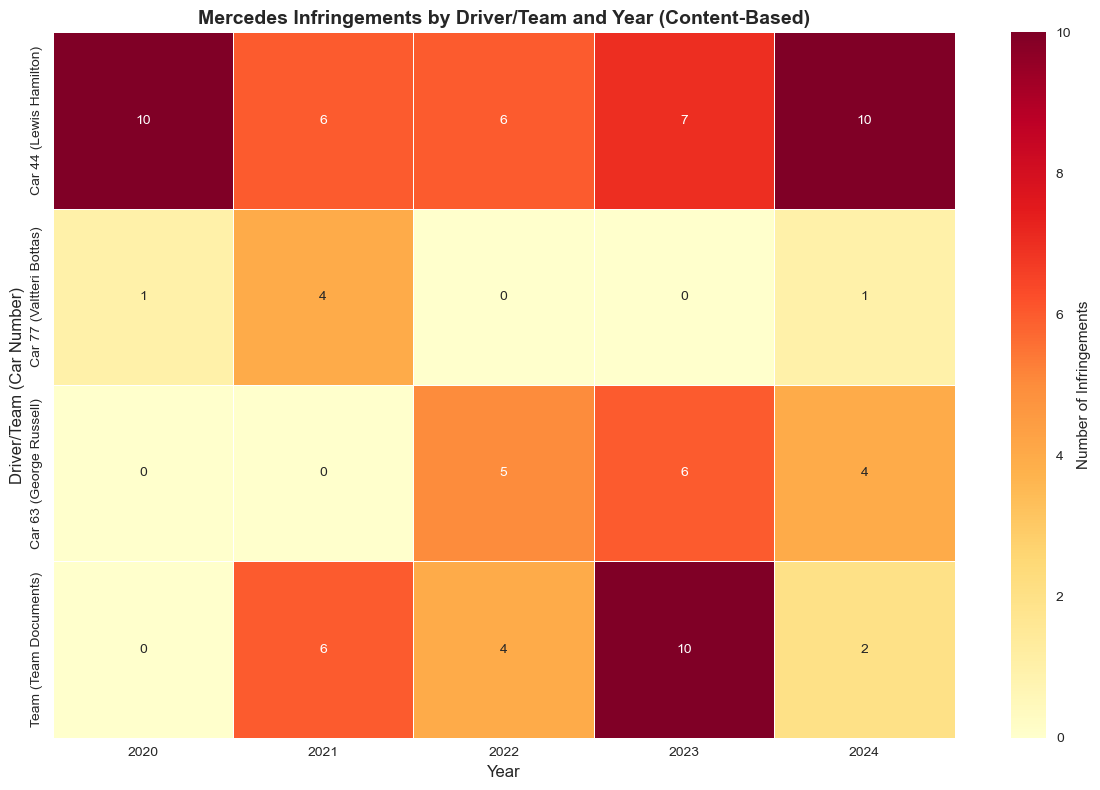


Updated Heatmap Insights (Content-Based):
--------------------------------------------------
Highest infringement count: 10 (Car 44 (Lewis Hamilton) in 2020)

Most problematic year for each driver (Content-Based):
  Lewis Hamilton: 2020 (10 infringements)
  Valtteri Bottas: 2021 (4 infringements)
  George Russell: 2023 (6 infringements)

Total infringements by year (Content-Based):
  2020: 11 infringements
  2021: 16 infringements
  2022: 15 infringements
  2023: 23 infringements
  2024: 17 infringements


In [25]:
# Create UPDATED heatmap using content-based analysis
print("\n" + "="*60)
print("UPDATED HEATMAP (CONTENT-BASED)")
print("="*60)

import seaborn as sns

# Prepare data for updated heatmap (including Team category)
updated_heatmap_data = []
car_labels = ['Car 44', 'Car 77', 'Car 63', 'Team']
driver_labels = ['Lewis Hamilton', 'Valtteri Bottas', 'George Russell', 'Team Documents']

for i, car in enumerate(car_labels):
    row = []
    for year in sorted(car_counts_content.keys()):
        row.append(car_counts_content[year][car])
    updated_heatmap_data.append(row)

# Create DataFrame for updated heatmap
df_updated_heatmap = pd.DataFrame(updated_heatmap_data, 
                                 index=[f"{car_labels[i]} ({driver_labels[i]})" for i in range(len(car_labels))],
                                 columns=sorted(car_counts_content.keys()))

# Create updated heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_updated_heatmap, 
            annot=True, 
            fmt='d', 
            cmap='YlOrRd',
            cbar_kws={'label': 'Number of Infringements'},
            linewidths=0.5,
            linecolor='white')

plt.title('Mercedes Infringements by Driver/Team and Year (Content-Based)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Driver/Team (Car Number)', fontsize=12)
plt.tight_layout()
plt.show()

# Print updated insights
print(f"\nUpdated Heatmap Insights (Content-Based):")
print("-" * 50)
max_car_year = df_updated_heatmap.max().max()
max_location = df_updated_heatmap.where(df_updated_heatmap == max_car_year).stack().index[0]
print(f"Highest infringement count: {max_car_year} ({max_location[0]} in {max_location[1]})")

# Find most problematic year for each driver
print(f"\nMost problematic year for each driver (Content-Based):")
for car in mercedes_cars.keys():
    driver_name = mercedes_cars[car]
    car_data = df_updated_heatmap.loc[f"{car} ({driver_name})"]
    max_year = car_data.idxmax()
    max_count = car_data.max()
    print(f"  {driver_name}: {max_year} ({max_count} infringements)")

# Calculate year totals
print(f"\nTotal infringements by year (Content-Based):")
year_totals_updated = df_updated_heatmap.sum()
for year, total in year_totals_updated.items():
    print(f"  {year}: {total} infringements")




KEYWORD FREQUENCY ANALYSIS

Processing 11 files in 2020...

Processing 16 files in 2021...

Processing 15 files in 2022...

Processing 23 files in 2023...

Processing 17 files in 2024...

Keyword frequency across all Mercedes documents:
------------------------------------------------------------
Total files processed: 82
Files containing keywords: 47

Keyword counts:
------------------------------
collision           :  13 occurrences
PU                  :  14 occurrences
Parc Ferme          :   5 occurrences
driving slowly      :   1 occurrences
late attendance     :   1 occurrences
impeding            :   8 occurrences
fined               :  19 occurrences


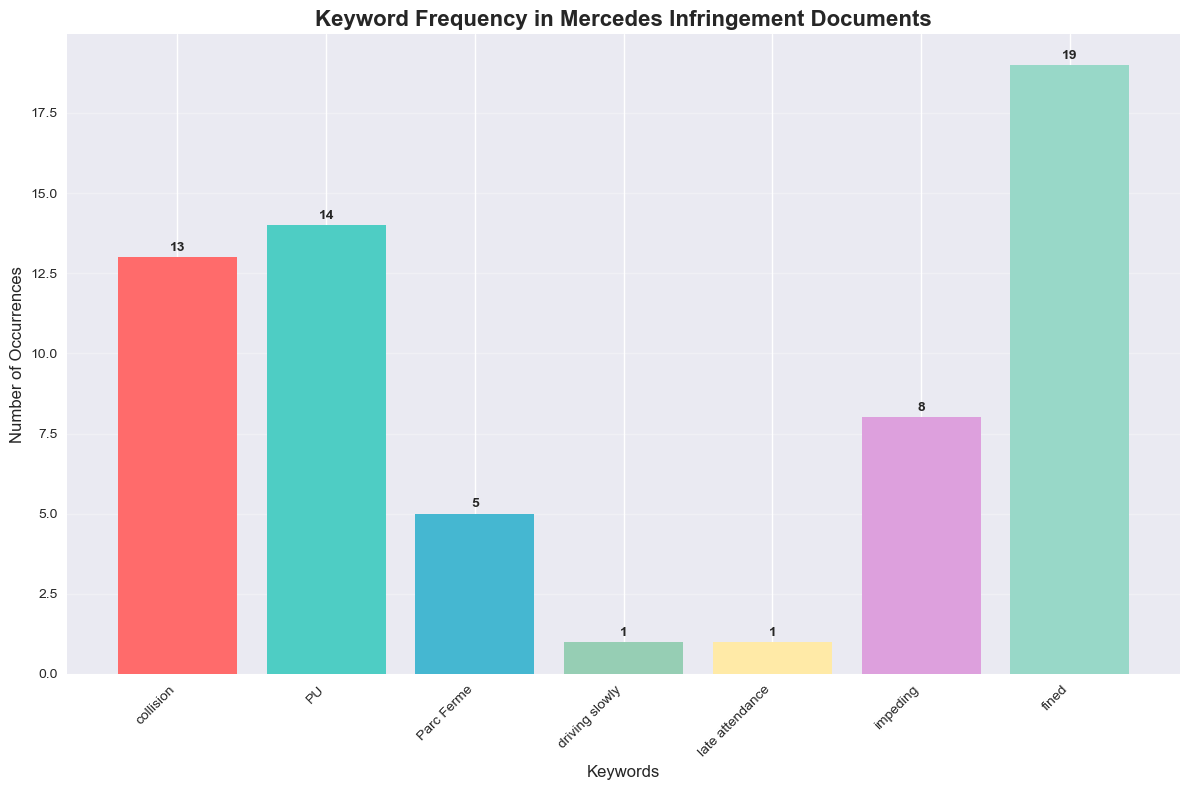


Sample files containing keywords:
--------------------------------------------------
 1. 2020 Austrian Grand Prix - Offence - Car 44 - incident with car 23.txt
    Keywords: collision, fined
 2. 2020 Russian Grand Prix - Decision - Car 44 - Turn 2 .txt
    Keywords: fined
 3. 2020 Russian Grand Prix - Replacement for Document 46 - Offence - Car 44 - 1st Practice Start.txt
    Keywords: fined
 4. 2021 Brazilian Grand Prix - Offence - Car 44 - DRS.txt
    Keywords: PU
 5. 2021 Brazilian Grand Prix - Offence - Car 44 - PU element.txt
    Keywords: PU
 6. 2021 Brazilian Grand Prix - Offence - Car 44 - Safety Belts.txt
    Keywords: PU, fined
 7. 2021 British Grand Prix - Offence - Car 44 - Causing a collision with car 33.txt
    Keywords: collision
 8. 2021 Hungarian Grand Prix - Offence - Car 77 - causing a collision.txt
    Keywords: collision
 9. 2021 Saudi Arabian Grand Prix - Offence - Car 44 - Impeding.txt
    Keywords: impeding
10. 2022 Abu Dhabi Grand Prix - Decision - Car 44 - Re

In [27]:
# Keyword frequency analysis across all Mercedes documents
print("\n" + "="*60)
print("KEYWORD FREQUENCY ANALYSIS")
print("="*60)

# Define keywords to search for
keywords = [
    "collision",
    "PU", 
    "Parc Ferme",
    "driving slowly",
    "late attendance",
    "impeding",
    "fined"
]

# Initialize keyword counters
keyword_counts = {}
for keyword in keywords:
    keyword_counts[keyword] = 0

# Count keyword occurrences across all years
total_files_processed = 0
files_with_keywords = {}

for year_folder in years:
    year_path = base_path / year_folder
    year_display = year_folder.replace('_inf_profile', '')
    
    if not year_path.exists():
        continue
    
    # Get all TXT files
    txt_files = list(year_path.glob("*.txt"))
    print(f"\nProcessing {len(txt_files)} files in {year_display}...")
    
    for txt_file in txt_files:
        try:
            # Read the content of the TXT file
            with open(txt_file, 'r', encoding='utf-8') as f:
                content = f.read().lower()
            
            total_files_processed += 1
            file_keywords = []
            
            # Check for each keyword in the content
            for keyword in keywords:
                keyword_lower = keyword.lower()
                if keyword_lower in content:
                    keyword_counts[keyword] += 1
                    file_keywords.append(keyword)
            
            # Track which files contain keywords
            if file_keywords:
                files_with_keywords[txt_file.name] = file_keywords
                
        except Exception as e:
            print(f"  ✗ Error reading {txt_file.name}: {e}")

# Display results
print(f"\nKeyword frequency across all Mercedes documents:")
print("-" * 60)
print(f"Total files processed: {total_files_processed}")
print(f"Files containing keywords: {len(files_with_keywords)}")

print(f"\nKeyword counts:")
print("-" * 30)
for keyword, count in keyword_counts.items():
    print(f"{keyword:20s}: {count:3d} occurrences")

# Create bar graph
plt.figure(figsize=(12, 8))
bars = plt.bar(keywords, list(keyword_counts.values()), 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])

# Add value labels on top of bars
for bar, count in zip(bars, keyword_counts.values()):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
             str(count), ha='center', va='bottom', fontweight='bold')

plt.title('Keyword Frequency in Mercedes Infringement Documents', fontsize=16, fontweight='bold')
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Show some examples of files containing keywords
print(f"\nSample files containing keywords:")
print("-" * 50)
for i, (filename, keywords_found) in enumerate(list(files_with_keywords.items())[:10]):
    print(f"{i+1:2d}. {filename}")
    print(f"    Keywords: {', '.join(keywords_found)}")

if len(files_with_keywords) > 10:
    print(f"    ... and {len(files_with_keywords) - 10} more files")



TRACK-WISE VIOLATION ANALYSIS

Processing 11 files in 2020...
  ✓ 2020 Austrian Grand Prix - Decision - Car 44 - alleged failure to slow for yellow flags.txt -> Austrian
  ✓ 2020 Austrian Grand Prix - Decision - review of decision (document 33).txt -> Austrian
  ✓ 2020 Austrian Grand Prix - Offence - Car 44 - Failure to slow for yellow flags (post review).txt -> Austrian
  ✓ 2020 Austrian Grand Prix - Offence - Car 44 - incident with car 23.txt -> Austrian
  ✓ 2020 Austrian Grand Prix - Offence - Car 44 - Leaving the track in turn 10.txt -> Austrian
  ✓ 2020 Austrian Grand Prix - Offence - Car 44 - Track Limits turn 10.txt -> Austrian
  ✓ 2020 Italian Grand Prix - Offence - Car 44 - Entering closed pit lane.txt -> Italian
  ✓ 2020 Russian Grand Prix - Decision - Car 44 - Turn 2 .txt -> Russian
  ✓ 2020 Russian Grand Prix - Replacement for Document 46 - Offence - Car 44 - 1st Practice Start.txt -> Russian
  ✓ 2020 Russian Grand Prix - Replacement for Document 47 - Offence - Car 44 - 2n

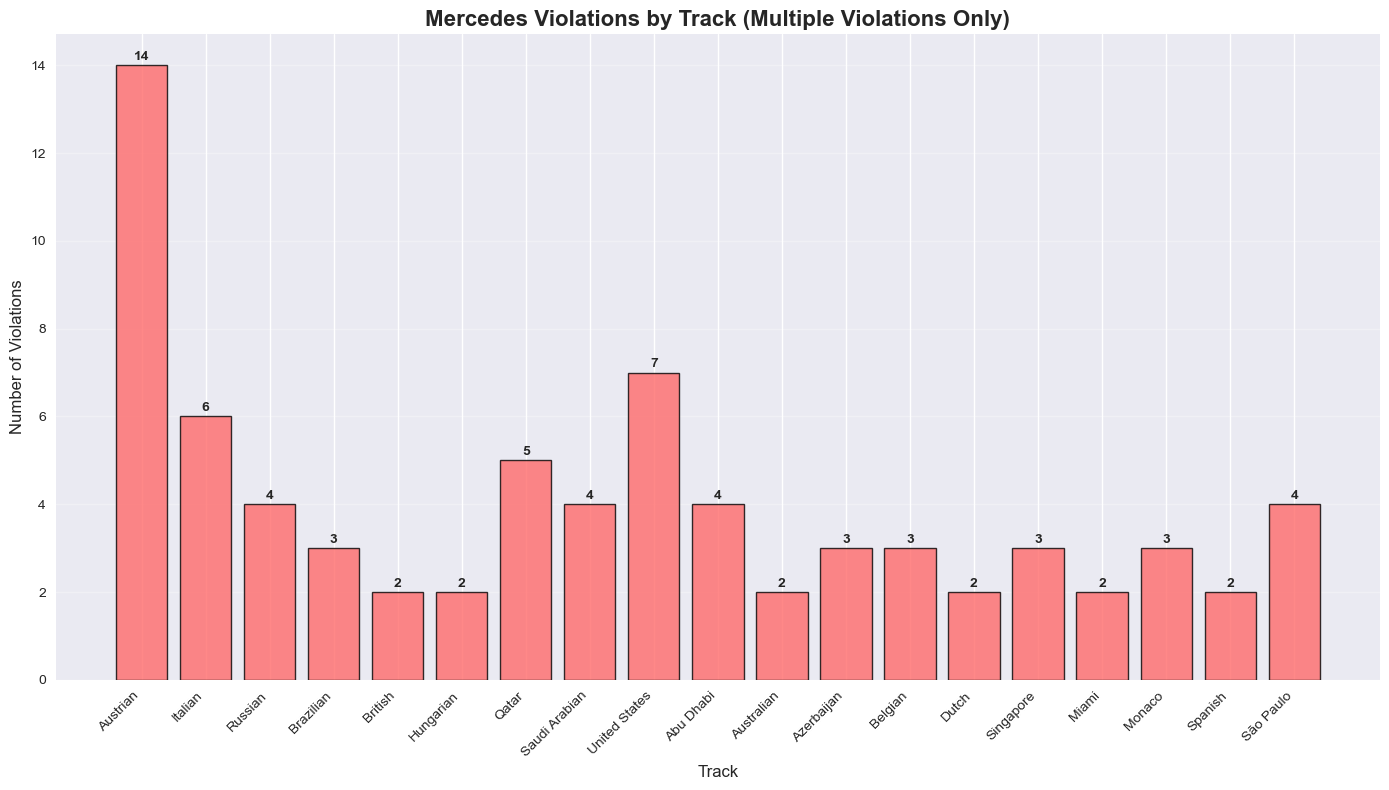


Detailed breakdown for tracks with multiple violations:
----------------------------------------------------------------------

Austrian (14 violations):
  - 2020 Austrian Grand Prix - Decision - Car 44 - alleged failure to slow for yellow flags.txt
  - 2020 Austrian Grand Prix - Decision - review of decision (document 33).txt
  - 2020 Austrian Grand Prix - Offence - Car 44 - Failure to slow for yellow flags (post review).txt
  - 2020 Austrian Grand Prix - Offence - Car 44 - incident with car 23.txt
  - 2020 Austrian Grand Prix - Offence - Car 44 - Leaving the track in turn 10.txt
  - 2020 Austrian Grand Prix - Offence - Car 44 - Track Limits turn 10.txt
  - 2021 Austrian Grand Prix - Decision - Car 77 - Alleged driving unnecessarily slowly .txt
  - 2022 Austrian Grand Prix - Offence - Car 44 - Parc Ferme Instructions.txt
  - 2022 Austrian Grand Prix - Offence - Car 63 - Causing a collision.txt
  - 2022 Austrian Grand Prix - Offence - Car 63 - Entered the track on foot.txt
  - 2023 Au

In [28]:
# Track-wise violation analysis
print("\n" + "="*60)
print("TRACK-WISE VIOLATION ANALYSIS")
print("="*60)

import re
from collections import defaultdict

# Initialize track counters
track_violations = defaultdict(int)
track_files = defaultdict(list)

# Process all Mercedes documents
total_files_processed = 0

for year_folder in years:
    year_path = base_path / year_folder
    year_display = year_folder.replace('_inf_profile', '')
    
    if not year_path.exists():
        continue
    
    # Get all TXT files
    txt_files = list(year_path.glob("*.txt"))
    print(f"\nProcessing {len(txt_files)} files in {year_display}...")
    
    for txt_file in txt_files:
        try:
            total_files_processed += 1
            
            # Extract track name from filename using pattern: "Year Place Grand Prix"
            filename_lower = txt_file.name.lower()
            
            # Pattern to match: year followed by place name followed by "grand prix"
            # Examples: "2020 austrian grand prix", "2021 brazilian grand prix"
            track_match = re.search(r'\d{4}\s+([^-\n]+?)\s+grand\s+prix', filename_lower)
            
            if track_match:
                track_name = track_match.group(1).strip()
                # Clean up track name - remove extra spaces and capitalize properly
                track_name = re.sub(r'\s+', ' ', track_name)
                track_name = track_name.title()
                
                track_violations[track_name] += 1
                track_files[track_name].append(txt_file.name)
                print(f"  ✓ {txt_file.name} -> {track_name}")
            else:
                print(f"  • {txt_file.name} -> Track not identified")
                
        except Exception as e:
            print(f"  ✗ Error reading {txt_file.name}: {e}")

# Display results
print(f"\nTrack-wise violation analysis:")
print("-" * 60)
print(f"Total files processed: {total_files_processed}")
print(f"Tracks with violations: {len(track_violations)}")

print(f"\nViolations by track:")
print("-" * 40)
for track, count in sorted(track_violations.items(), key=lambda x: x[1], reverse=True):
    if count > 1:
        print(f"{track:30s}: {count:2d} violations")
    else:
        print(f"{track:30s}: {count:2d} violation")

# Create bar chart for tracks with multiple violations
tracks_multiple = {track: count for track, count in track_violations.items() if count > 1}

if tracks_multiple:
    plt.figure(figsize=(14, 8))
    
    tracks = list(tracks_multiple.keys())
    counts = list(tracks_multiple.values())
    
    bars = plt.bar(range(len(tracks)), counts, 
                   color='#FF6B6B', edgecolor='black', linewidth=1, alpha=0.8)
    
    # Add value labels on top of bars
    for bar, count in zip(bars, counts):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05, 
                 str(count), ha='center', va='bottom', fontweight='bold')
    
    plt.title('Mercedes Violations by Track (Multiple Violations Only)', fontsize=16, fontweight='bold')
    plt.xlabel('Track', fontsize=12)
    plt.ylabel('Number of Violations', fontsize=12)
    plt.xticks(range(len(tracks)), tracks, rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# Show detailed breakdown for tracks with multiple violations
print(f"\nDetailed breakdown for tracks with multiple violations:")
print("-" * 70)
for track, count in sorted(tracks_multiple.items(), key=lambda x: x[1], reverse=True):
    print(f"\n{track} ({count} violations):")
    for file in track_files[track]:
        print(f"  - {file}")

print(f"\nTracks with single violations:")
print("-" * 40)
single_violations = {track: count for track, count in track_violations.items() if count == 1}
for track in sorted(single_violations.keys()):
    print(f"{track}")


## Analysis of Processed Dataset

This section analyzes the preprocessed Mercedes infringement documents (no_footer_ files) to understand the impact of preprocessing on document length and content.


In [29]:
# Processed Document Length Analysis (no_footer_ files)
print("\n" + "="*60)
print("PROCESSED DOCUMENT LENGTH ANALYSIS (NO_FOOTER_ FILES)")
print("="*60)

# Define path to processed documents
processed_base_path = Path("pre_proc_op")
processed_years = ["2020", "2021", "2022", "2023", "2024"]

# Calculate average document length for processed documents
processed_avg_lengths = {}
processed_total_chars = {}
processed_doc_counts = {}

for year in processed_years:
    year_path = processed_base_path / year
    
    if not year_path.exists():
        processed_avg_lengths[year] = 0
        processed_total_chars[year] = 0
        processed_doc_counts[year] = 0
        print(f"{year}: Folder not found")
        continue
    
    # Get all no_footer_ TXT files
    no_footer_files = list(year_path.glob("no_footer_*.txt"))
    
    if not no_footer_files:
        processed_avg_lengths[year] = 0
        processed_total_chars[year] = 0
        processed_doc_counts[year] = 0
        print(f"{year}: No no_footer_ files found")
        continue
    
    # Calculate lengths
    lengths = []
    year_total_chars = 0
    
    for txt_file in no_footer_files:
        try:
            with open(txt_file, 'r', encoding='utf-8') as f:
                content = f.read()
                length = len(content)
                lengths.append(length)
                year_total_chars += length
        except Exception as e:
            print(f"Error reading {txt_file.name}: {e}")
            continue
    
    if lengths:
        avg_length = np.mean(lengths)
        processed_avg_lengths[year] = avg_length
        processed_total_chars[year] = year_total_chars
        processed_doc_counts[year] = len(lengths)
        
        print(f"{year}: {len(lengths)} docs, avg length: {avg_length:.0f} chars")
    else:
        processed_avg_lengths[year] = 0
        processed_total_chars[year] = 0
        processed_doc_counts[year] = 0
        print(f"{year}: No valid files found")

print(f"\nTotal processed documents analyzed: {sum(processed_doc_counts.values())}")
print(f"Total processed characters: {sum(processed_total_chars.values()):,}")



PROCESSED DOCUMENT LENGTH ANALYSIS (NO_FOOTER_ FILES)
2020: 11 docs, avg length: 917 chars
2021: 16 docs, avg length: 973 chars
2022: 15 docs, avg length: 740 chars
2023: 23 docs, avg length: 795 chars
2024: 17 docs, avg length: 923 chars

Total processed documents analyzed: 82
Total processed characters: 70,733


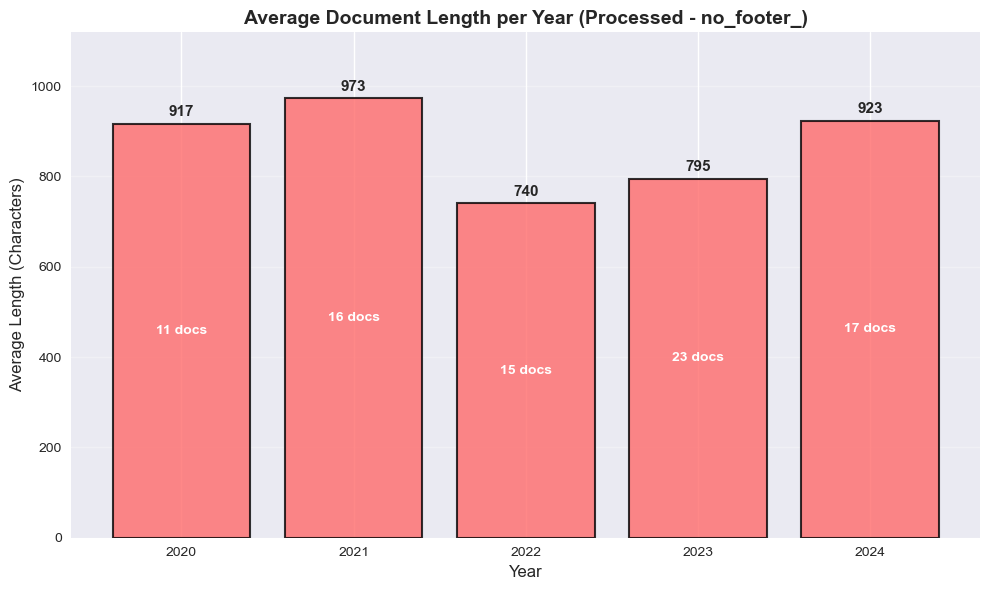


Processed Document Length Summary:
Overall average length: 870 characters
Year with longest docs: 2021 (973 chars)
Year with shortest docs: 2022 (740 chars)
Standard deviation: 98 characters


In [30]:
# Create DataFrame and bar chart for processed document lengths
df_processed_lengths = pd.DataFrame([
    {'Year': year, 'Avg_Length': processed_avg_lengths[year], 'Doc_Count': processed_doc_counts[year]}
    for year in processed_avg_lengths.keys()
])

# Create bar chart for average processed document length
plt.figure(figsize=(10, 6))

# Create the bar chart
bars = plt.bar(df_processed_lengths['Year'], df_processed_lengths['Avg_Length'], 
               color='#FF6B6B', edgecolor='black', linewidth=1.5, alpha=0.8)

# Add average length labels on top of each bar
for bar, avg_len in zip(bars, df_processed_lengths['Avg_Length']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{avg_len:.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Customize the chart
plt.title('Average Document Length per Year (Processed - no_footer_)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Length (Characters)', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.ylim(0, max(df_processed_lengths['Avg_Length']) * 1.15)

# Add document count annotations
for i, (year, avg_len, count) in enumerate(zip(df_processed_lengths['Year'], df_processed_lengths['Avg_Length'], df_processed_lengths['Doc_Count'])):
    plt.text(i, avg_len/2, f'{count} docs', ha='center', va='center', 
             fontsize=10, color='white', fontweight='bold')

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nProcessed Document Length Summary:")
print(f"Overall average length: {df_processed_lengths['Avg_Length'].mean():.0f} characters")
print(f"Year with longest docs: {df_processed_lengths.loc[df_processed_lengths['Avg_Length'].idxmax(), 'Year']} ({df_processed_lengths['Avg_Length'].max():.0f} chars)")
print(f"Year with shortest docs: {df_processed_lengths.loc[df_processed_lengths['Avg_Length'].idxmin(), 'Year']} ({df_processed_lengths['Avg_Length'].min():.0f} chars)")
print(f"Standard deviation: {df_processed_lengths['Avg_Length'].std():.0f} characters")



COMPARISON: UNPROCESSED vs PROCESSED DOCUMENTS

Document Length Comparison:
--------------------------------------------------------------------------------
Year   Unprocessed  Processed  Reduction  Unproc Docs  Proc Docs 
--------------------------------------------------------------------------------
2020   1621         917        43.4      % 11           11        
2021   1767         973        44.9      % 16           16        
2022   1498         740        50.6      % 15           15        
2023   1618         795        50.9      % 23           23        
2024   1862         923        50.4      % 17           17        

Overall Statistics:
----------------------------------------
Total unprocessed characters: 137,437
Total processed characters: 70,733
Overall reduction: 48.5%
Characters removed: 66,704


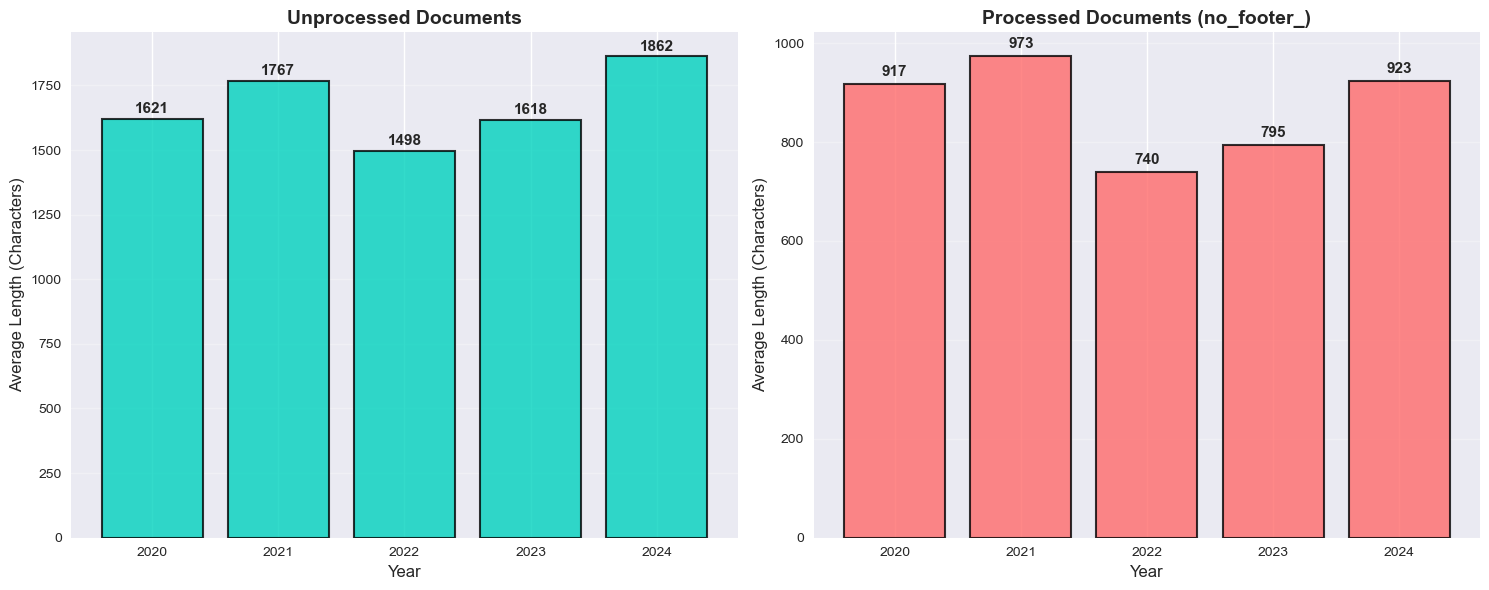

In [31]:
# Comparison between unprocessed and processed documents
print("\n" + "="*60)
print("COMPARISON: UNPROCESSED vs PROCESSED DOCUMENTS")
print("="*60)

# Create comparison DataFrame
comparison_data = []
for year in processed_years:
    unprocessed_avg = avg_lengths.get(year, 0)
    processed_avg = processed_avg_lengths.get(year, 0)
    reduction_percent = ((unprocessed_avg - processed_avg) / unprocessed_avg * 100) if unprocessed_avg > 0 else 0
    
    comparison_data.append({
        'Year': year,
        'Unprocessed_Avg': unprocessed_avg,
        'Processed_Avg': processed_avg,
        'Reduction_Percent': reduction_percent,
        'Unprocessed_Docs': doc_counts.get(year, 0),
        'Processed_Docs': processed_doc_counts.get(year, 0)
    })

df_comparison = pd.DataFrame(comparison_data)

# Display comparison table
print(f"\nDocument Length Comparison:")
print("-" * 80)
print(f"{'Year':<6} {'Unprocessed':<12} {'Processed':<10} {'Reduction':<10} {'Unproc Docs':<12} {'Proc Docs':<10}")
print("-" * 80)
for _, row in df_comparison.iterrows():
    print(f"{row['Year']:<6} {row['Unprocessed_Avg']:<12.0f} {row['Processed_Avg']:<10.0f} {row['Reduction_Percent']:<10.1f}% {row['Unprocessed_Docs']:<12} {row['Processed_Docs']:<10}")

# Calculate overall statistics
total_unprocessed_chars = sum(total_chars.values())
total_processed_chars = sum(processed_total_chars.values())
overall_reduction = ((total_unprocessed_chars - total_processed_chars) / total_unprocessed_chars * 100) if total_unprocessed_chars > 0 else 0

print(f"\nOverall Statistics:")
print("-" * 40)
print(f"Total unprocessed characters: {total_unprocessed_chars:,}")
print(f"Total processed characters: {total_processed_chars:,}")
print(f"Overall reduction: {overall_reduction:.1f}%")
print(f"Characters removed: {total_unprocessed_chars - total_processed_chars:,}")

# Create side-by-side comparison chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Unprocessed chart
bars1 = ax1.bar(df_lengths['Year'], df_lengths['Avg_Length'], 
                color='#00D2BE', edgecolor='black', linewidth=1.5, alpha=0.8)
ax1.set_title('Unprocessed Documents', fontsize=14, fontweight='bold')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Length (Characters)', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

# Add labels to unprocessed chart
for bar, avg_len in zip(bars1, df_lengths['Avg_Length']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{avg_len:.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Processed chart
bars2 = ax2.bar(df_processed_lengths['Year'], df_processed_lengths['Avg_Length'], 
                color='#FF6B6B', edgecolor='black', linewidth=1.5, alpha=0.8)
ax2.set_title('Processed Documents (no_footer_)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Average Length (Characters)', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

# Add labels to processed chart
for bar, avg_len in zip(bars2, df_processed_lengths['Avg_Length']):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{avg_len:.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()
